# Notebook 4: Ridge and Lasso Regression
Since we are dealing with a lot of multicollinearity in our world bank data, we expect Ridge and Lasso regression to perform better than the least squares regression from Notebook 2.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import ana_utils, vis_utils

from sklearn import linear_model

np.random.seed(1)

Import datasets from Notebook 1

In [5]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
wb_data_short = pd.read_csv("data/wb_data_short.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

## Ridge Regression

In [4]:
ridge = sklearn.linear_model.Ridge()

Mean loss (full set of indicators): 0.37192413726982193
The average size of the first ten coefficients ((full set of indicators)): [ 0.3016  0.1392  0.2037  0.1831 -0.1228 -0.1387  0.2448 -0.2601 -0.2179
 -0.6856] 

Mean loss (reduced set of indicators): 0.38553260037251713
The average size of the first ten coefficients (reduced set of indicators): [ 0.334   0.1544  0.194   0.0096 -0.17    0.2838 -0.3028 -0.2603 -0.8606
 -0.4861]


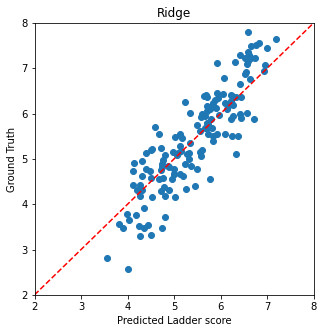

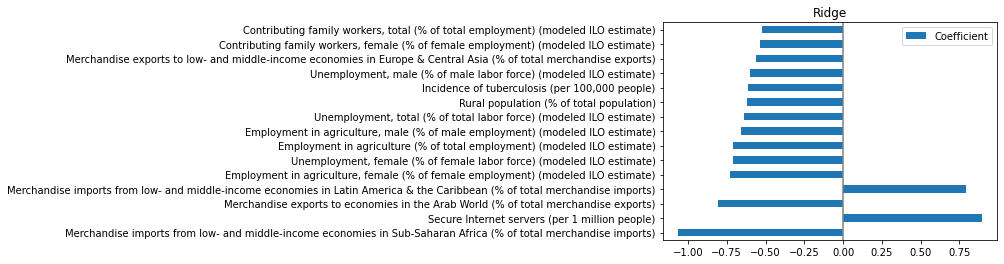

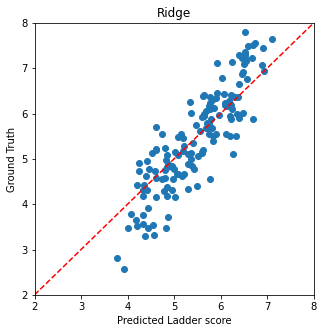

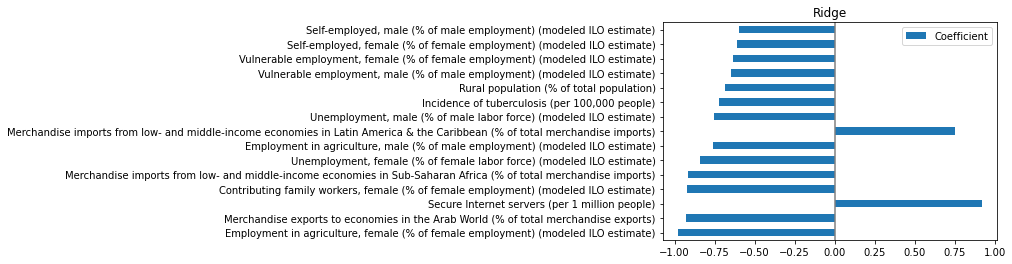

In [5]:
test_size = 30
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs[:10], "\n")
vis_utils.visualize_predictions(reg_model=ridge, data=wb_data, gt=whr_data)
vis_utils.visualize_coefs(reg_model=ridge, indicators=wb_data.columns.values, n=15)

loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data_short, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])
vis_utils.visualize_predictions(reg_model=ridge, data=wb_data_short, gt=whr_data)
vis_utils.visualize_coefs(reg_model=ridge, indicators=wb_data_short.columns.values, n=15)


## Lasso regression

In [6]:
lasso = sklearn.linear_model.Lasso(alpha=0.01)

Mean loss (full set of indicators): 0.4934998153706513
The average size of the first ten coefficients ((full set of indicators)): 0.0 

Mean loss (reduced set of indicators): 0.4905812191778457
The average size of the first ten coefficients (reduced set of indicators): 0.0


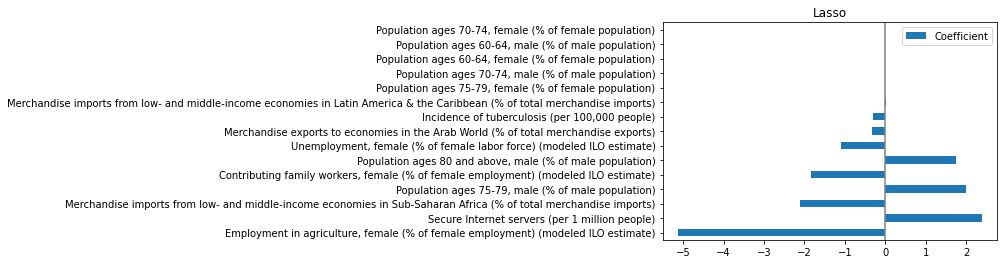

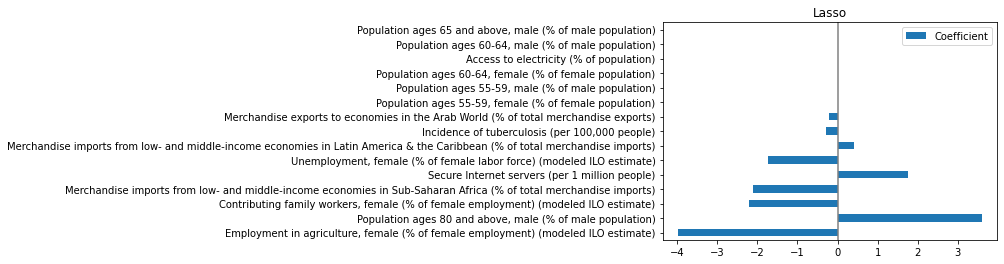

In [7]:
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs, "\n")
#vis_utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
vis_utils.visualize_coefs(reg_model=lasso, indicators=wb_data.columns.values, n=15)

loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data_short, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs)
#vis_utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
vis_utils.visualize_coefs(reg_model=lasso, indicators=wb_data_short.columns.values, n=15)

## Optimizing penalty parameter $\alpha$

In [14]:
alphas = [0.0001, 0.001, 0.01, 0.05, 0.075, 0.1, 0.125, 0.15, 0.25, 0.5, 1, 10, 100]

Mean loss for Ridge (alpha = 0.0001 ): 1.4836429654367576
Mean loss for Lasso (alpha = 0.0001 ): 0.5717076469526005
max coef:  29.747444478442684
Mean loss for Ridge (alpha = 0.001 ): 0.7477311071511724
Mean loss for Lasso (alpha = 0.001 ): 0.3824092701171705
max coef:  6.300414287348047
Mean loss for Ridge (alpha = 0.01 ): 0.47665062758565624
Mean loss for Lasso (alpha = 0.01 ): 0.4949131834198345
max coef:  6.322953837959607
Mean loss for Ridge (alpha = 0.05 ): 0.3739679808046399
Mean loss for Lasso (alpha = 0.05 ): 1.2584103518062353
max coef:  0.0
Mean loss for Ridge (alpha = 0.075 ): 0.3498558424847373
Mean loss for Lasso (alpha = 0.075 ): 1.2559752487673759
max coef:  0.0
Mean loss for Ridge (alpha = 0.1 ): 0.3391283933456275
Mean loss for Lasso (alpha = 0.1 ): 1.2629079866619206
max coef:  0.0
Mean loss for Ridge (alpha = 0.125 ): 0.3372643356986806
Mean loss for Lasso (alpha = 0.125 ): 1.2656754094126619
max coef:  0.0
Mean loss for Ridge (alpha = 0.15 ): 0.3325668556726752
Mea

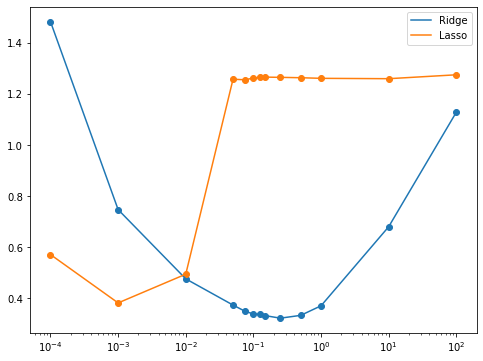

In [15]:
# ridge mean loss list and lasso mean loss list
rml_list = []
lml_list = []

for alpha in alphas:
    ridge = sklearn.linear_model.Ridge(alpha=alpha)    
    loss_list, ridge_mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
    print("Mean loss for Ridge (alpha =", alpha, "):", ridge_mean_loss)
    rml_list.append(ridge_mean_loss)
    
    lasso = sklearn.linear_model.Lasso(alpha=alpha, max_iter=10000)
    loss_list, lasso_mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
    print("Mean loss for Lasso (alpha =", alpha, "):", lasso_mean_loss)
    print("max coef: ", max(abs(lasso.coef_)))
    lml_list.append(lasso_mean_loss)

vis_utils.visualize_alphas(alphas, [rml_list, lml_list])

## Partial Least Squares Regression

In [2]:
from sklearn.cross_decomposition import PLSRegression

Mean loss for PLS (n = 1 ): 0.5271495364248826
Mean loss for PLS (n = 2 ): 0.3960997601094
Mean loss for PLS (n = 3 ): 0.3675301684621015
Mean loss for PLS (n = 4 ): 0.35700412925365305
Mean loss for PLS (n = 5 ): 0.3609451041855043


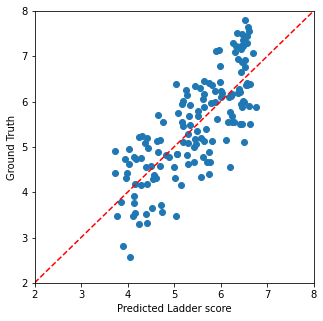

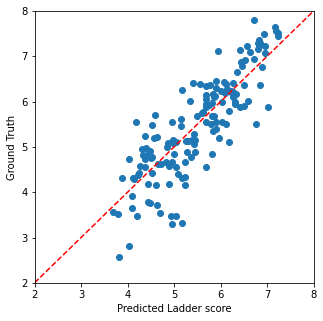

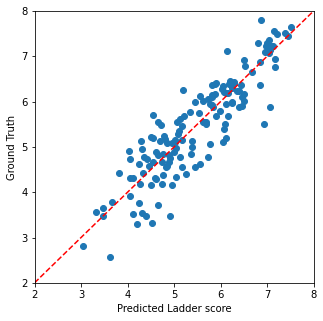

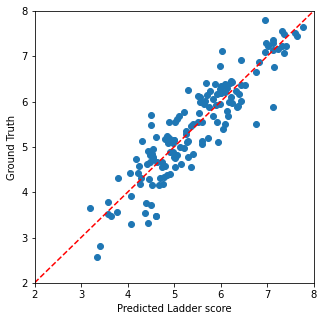

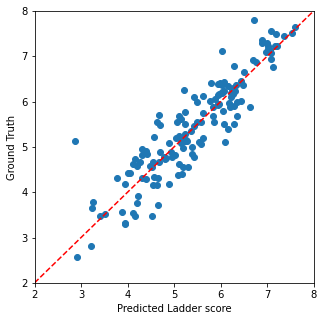

In [9]:
test_size=30
num_components = [1, 2, 3, 4, 5]
pls_loss_list = []

for n in num_components:
    pls = PLSRegression(n_components=n)   
    loss_list, pls_mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=pls, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
    print("Mean loss for PLS (n =", n, "):", pls_mean_loss)
    vis_utils.visualize_predictions(reg_model=pls, data=wb_data, gt=whr_data)
    pls_loss_list.append(pls_mean_loss)

Mean loss for PLS (n = 6 ): 0.3787101765007742
Mean loss for PLS (n = 7 ): 0.40620292125217394
Mean loss for PLS (n = 8 ): 0.4462003753681339
Mean loss for PLS (n = 9 ): 0.48591838638349427


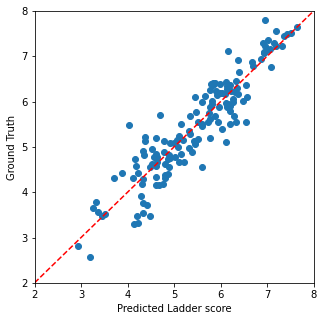

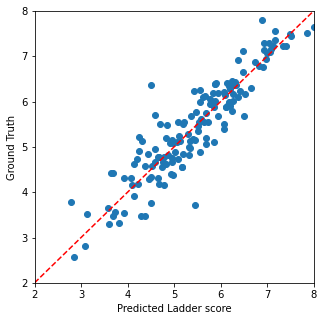

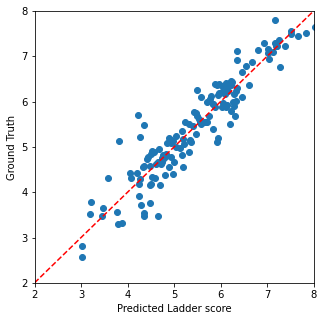

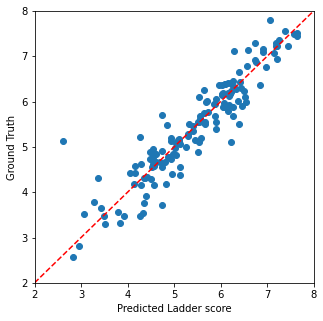

In [10]:
num_components = [6,7,8,9]
pls_loss_list = []

for n in num_components:
    pls = PLSRegression(n_components=n)   
    loss_list, pls_mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=pls, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
    print("Mean loss for PLS (n =", n, "):", pls_mean_loss)
    vis_utils.visualize_predictions(reg_model=pls, data=wb_data, gt=whr_data)
    pls_loss_list.append(pls_mean_loss)